# Tarea 1

Maria Jose Meisel

Librerias

In [36]:
import numpy as np
import pandas as pd
from bokeh.io import curdoc, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider, CustomJS
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import Figure, output_file, show
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import warnings
from plotly.graph_objects import Layout
import plotly.graph_objects as go
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

## 1.1

#### Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.

In [37]:
data_1=pd.read_csv('https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv')
data_1.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

#### Filtra el DataFrame para incluir solo las filas correspondientes a los ganadores de medallas de 2016

In [38]:
dt_2016 = data_1[data_1['Year'] == 2016]
dt_2016.head()

ID               Name Sex   Age  Height  Weight     Team  NOC  \
80   22      Andreea Aanei   F  22.0   170.0   125.0  Romania  ROU   
139  51  Nstor Abad Sanjun   M  23.0   167.0    64.0    Spain  ESP   
140  51  Nstor Abad Sanjun   M  23.0   167.0    64.0    Spain  ESP   
141  51  Nstor Abad Sanjun   M  23.0   167.0    64.0    Spain  ESP   
142  51  Nstor Abad Sanjun   M  23.0   167.0    64.0    Spain  ESP   

           Games  Year  Season            City          Sport  \
80   2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
139  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
140  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
141  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
142  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   

                                       Event Medal  
80   Weightlifting Women's Super-Heavyweight   NaN  
139   Gymnastics Men's Individual All-Around   NaN  
140          Gymnastics Men's Floor Exercise   NaN  
141           Gymnastics Men's Parallel Bars   NaN  
142          Gymnastics Men's Horizontal Bar   NaN

### Enumera los cinco deportes más importantes en función del mayor número de medallas concedidas. Filtra el DataFrame una vez más para incluir solo los registros de los cinco deportes principales en 2016.

In [39]:
tab=pd.crosstab(index =  dt_2016['Sport'], columns =  dt_2016['Medal'])
tab['total_medal']=tab['Bronze']+tab['Gold']+tab['Silver']
tab.nlargest(5,'total_medal')

Medal      Bronze  Gold  Silver  total_medal
Sport                                       
Athletics      62    66      64          192
Swimming       57    71      63          191
Rowing         48    48      48          144
Football       36    35      35          106
Hockey         33    34      32           99

In [40]:
dt_sport=dt_2016[dt_2016.Sport.isin(['Athletics', 'Swimming','Rowing','Football','Hockey'])]

### Genere un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales.

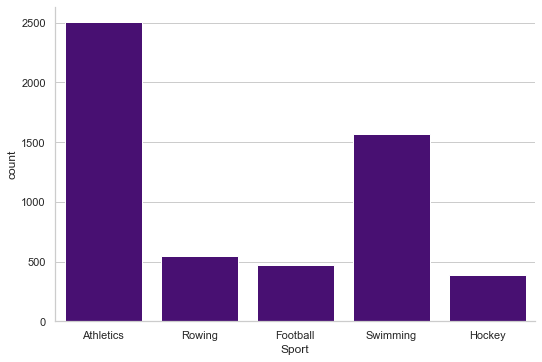

In [41]:
sns.catplot("Sport", data = dt_sport, aspect = 1.5, kind = "count", color = "indigo")

### Generar un histograma para la característica Edad de todos los ganadores de medallas en los cinco deportes principales (2016).

<AxesSubplot:xlabel='Age', ylabel='Count'>

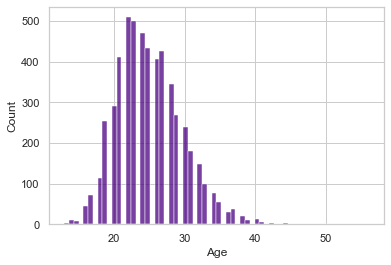

In [42]:
sns.histplot(data=dt_sport, x="Age",color="indigo")

### Genera un gráfico de barras que indique cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016.

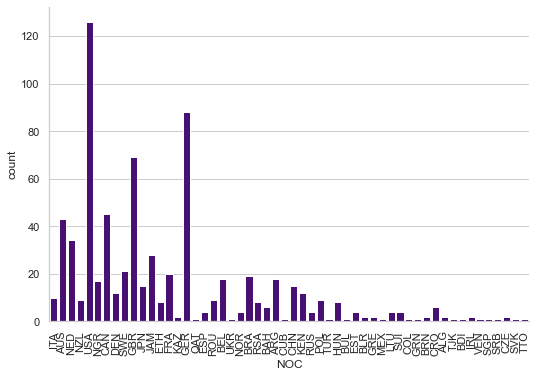

In [43]:
pais=dt_sport.dropna()
ax=sns.catplot("NOC", data = pais, aspect = 1.5, kind = "count", color = "indigo")
ax.set_xticklabels(rotation=90)

### Genere un gráfico de barras que indique el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.

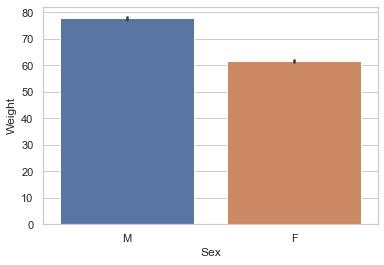

In [44]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = "Sex", y = "Weight", data = dt_sport, estimator = np.mean)

## 1.2

### Descargue el conjunto de datos y formatéelo como un pandas DataFrame
### Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad

In [45]:
dt_2016 = data_1[data_1['Year'] == 2016]
tab=pd.crosstab(index =  dt_2016['Sport'], columns =  dt_2016['Medal'])
tab['total_medal']=tab['Bronze']+tab['Gold']+tab['Silver']
tab.nlargest(5,'total_medal')
dt_sport=dt_2016[dt_2016.Sport.isin(['Athletics', 'Swimming','Rowing','Football','Hockey'])]

### Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

Variables Numericas

In [46]:
dt_sport.describe()

ID          Age       Height       Weight    Year
count    5489.000000  5489.000000  5355.000000  5356.000000  5489.0
mean    67945.007834    25.137730   177.594211    70.231329  2016.0
std     39584.115570     4.602689    10.541992    14.761764     0.0
min        55.000000    13.000000   143.000000    38.000000  2016.0
25%     33002.000000    22.000000   170.000000    60.000000  2016.0
50%     69691.000000    25.000000   178.000000    69.000000  2016.0
75%    101954.000000    28.000000   185.000000    79.000000  2016.0
max    135547.000000    56.000000   209.000000   165.000000  2016.0

Variables Categoricas

In [47]:
dt_sport.describe(include=object)

Name   Sex           Team   NOC        Games  \
count                     5489  5489           5489  5489         5489   
unique                    4620     2            205   205            1   
top     Sarah Frederica Sjstrm     M  United States   USA  2016 Summer   
freq                         7  2904            319   319         5489   

        Season            City      Sport                    Event Medal  
count     5489            5489       5489                     5489   732  
unique       1               1          5                       99     3  
top     Summer  Rio de Janeiro  Athletics  Football Men's Football  Gold  
freq      5489            5489       2508                      270   254

### Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight

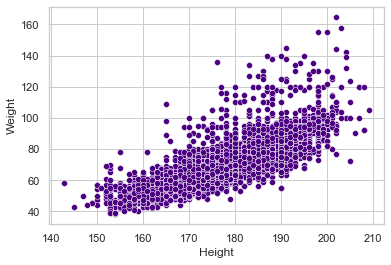

In [48]:
ax = sns.scatterplot(x="Height", y="Weight", data=dt_sport,color='Indigo')

### Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

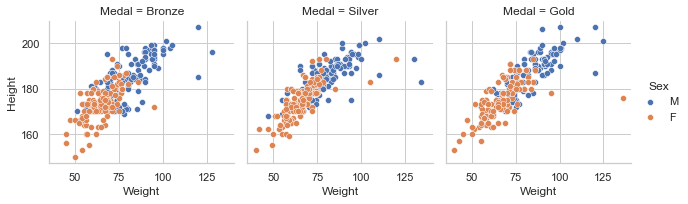

In [49]:
grid = sns.FacetGrid(dt_sport, col = "Medal", hue = "Sex")
grid.map(sns.scatterplot, "Weight", "Height")
grid.add_legend()
plt.show()

### Vuelve a crear el DataFrame de las emisiones de dióxido de carbono y del PIB.

In [50]:
gm=pd.read_csv('gapminder.csv')
co2=pd.read_csv('co2.csv')
df_gm = gm[['Country', 'region']].drop_duplicates()
df_w_regions = pd.merge(co2, df_gm, left_on='country', right_on='Country', how='inner')
df_w_regions = df_w_regions.drop('Country', axis='columns')
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])
columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns

df_co2 = new_co2[new_co2['year'].astype('int64') > 1963]
df_co2 = df_co2.sort_values(by=['country', 'year'])
df_co2['year'] = df_co2['year'].astype('int64')
df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data = data.dropna()
data.head()

country      region  year     co2     gdp
0  Afghanistan  South Asia  1964  0.0863  1182.0
1  Afghanistan  South Asia  1965  0.1010  1182.0
2  Afghanistan  South Asia  1966  0.1080  1168.0
3  Afghanistan  South Asia  1967  0.1240  1173.0
4  Afghanistan  South Asia  1968  0.1160  1187.0

### Crea un gráfico de dispersión con los ejes x e y como year y co2 respectivamente. Añada un para los valores de co2 con el parámetro marginaly_y.

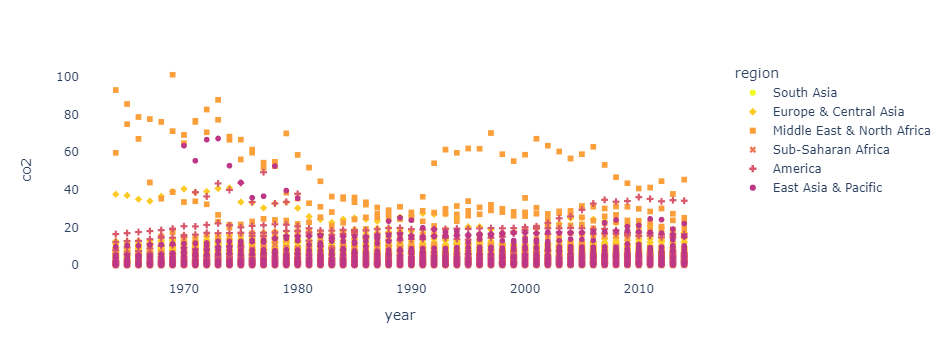

In [51]:
fig = px.scatter(df_co2, x="year", y="co2", color="region", symbol="region",color_discrete_sequence= px.colors.sequential.Plasma_r,)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Crea un gráfico de caja para los valores del PIB con el parámetro marginal_x. Añada los parámetros de parámetros de animación en la columna del año

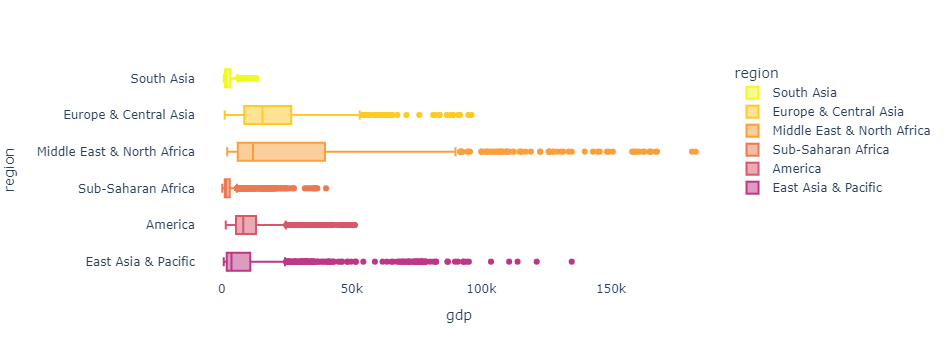

In [52]:
fig = px.box(data, x="gdp", y="region",color="region",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

### Crea un gráfico de dispersión con los ejes x e y como gdp y co2 respectivamente.

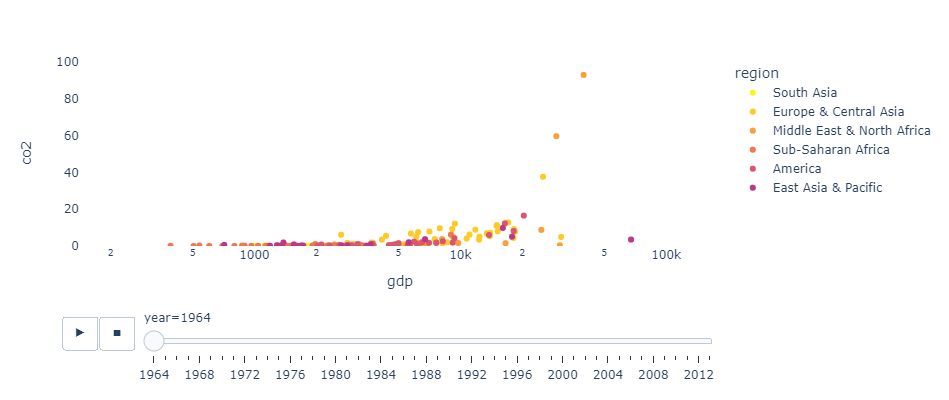

In [53]:
xmin, xmax = min(data.gdp), max(data.gdp)
ymin, ymax = min(data.co2), max(data.co2)
fig = px.scatter(data, 
                 x="gdp", y="co2", 
                 animation_frame="year",
                 animation_group="country", 
                 color="region", 
                 width=1579, height=400, 
                 log_x=True, 
                 size_max=45,
                 range_x=[xmin,xmax],
                 range_y=[ymin,ymax],
                color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Cree un contorno de densidad con los ejes x e y como pib y co2 respectivamente.

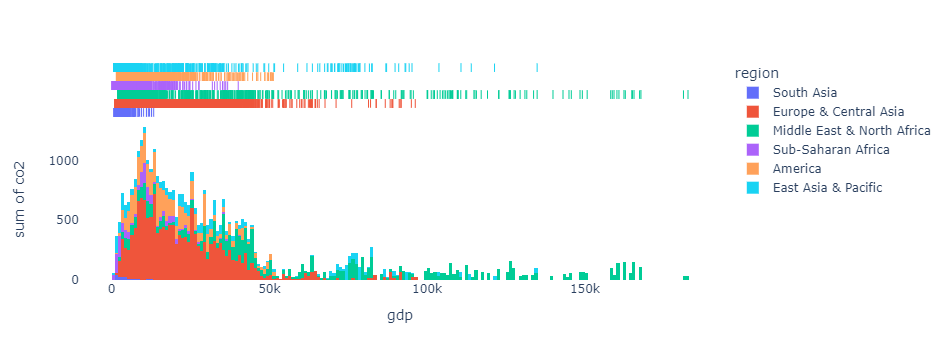

In [54]:
fig = px.histogram(data, x="gdp", y="co2", color="region", marginal="rug",hover_data=data.columns)
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

## 1.4

### Descargue el conjunto de datos googleplaystore.csv y formatéelo como un pandas DataFrame

In [55]:
df = pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### Elimina las entradas del DataFrame que tienen valores de característica de NA.

In [56]:
df.dropna(inplace=True)
df.shape

(9360, 13)

### Cree el gráfico de barras necesario del número de aplicaciones en cada categoría Content Rating

In [57]:
graph=df.sample(n=5000, random_state=1)
alt.Chart(graph).mark_bar().encode(
    x = 'Content Rating:N',
    y = 'count():Q'
).properties(width=350)

alt.Chart(...)

### Cree el mapa de calor necesario indicando el número de aplicaciones en la app en rangos Category y Rating

In [58]:
alt.Chart(graph).mark_rect().encode(
    alt.X('Category', bin = False),
    alt.Y('Rating', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='App'))
).properties(width=350)

alt.Chart(...)

### Combine el código del gráfico de barras y del mapa de calor y cree una visualización con ambos gráficos vinculados dinámicamente entre sí.

In [59]:
bars = alt.Chart(graph).mark_bar().encode(
    x = 'Content Rating:N',
    y = 'count():Q'
).properties(width=350)

heatmap = alt.Chart(graph).mark_rect().encode(
    alt.X('Category', bin = False),
    alt.Y('Rating', bin = True),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'), legend=alt.Legend(title='App'))
).properties(width=350)
bars | heatmap

alt.HConcatChart(...)

### Interprete cada visualización

El grafico de barras para _Content Rating_ nos permite concluir que la mayoria de aplicaciones son hechas para todo publico. El mapa de calor nos permite concluir que las apps de familia y finanzas tiene mejor que rating que las demas apps.